# Supervised Machine Learning


We are going to predict:
- Number of people attacking
- Weapon
- If the attack is going to be extended more than 24h


In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

In [172]:
gt = pd.read_csv('CSVs/globalterrorism10000.csv')
display(gt.shape)
display(gt.columns)
gt.head()

(10000, 42)

Index(['iyear', 'imonth', 'iday', 'more_than_24h', 'country_txt', 'city',
       'latitude', 'longitude', 'news', 'suicide', 'attacktype',
       'attacktype_txt', 'targtype', 'targtype_txt', 'band_name',
       'npeople_attacking', 'weapon', 'weapon_txt', 'nkill', 'news_processed',
       'positive_sentiment', 'negative_sentiment', 'kill', 'attack', 'damag',
       'wound', 'polic', 'explos', 'fire', 'injur', 'shot', 'bomb', 'vehicl',
       'suspect', 'suicid', 'iraq', 'civilian', 'islam', 'taliban', 'pakistan',
       'maoist', 'india'],
      dtype='object')

,iyear,imonth,iday,more_than_24h,country_txt,city,latitude,longitude,news,suicide,...,vehicl,suspect,suicid,iraq,civilian,islam,taliban,pakistan,maoist,india
0,1970,3,5,0,United States,San Juan,18.386932,-66.061127,3/5/1970: Unknown Puerto Rican Nationalists as...,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,3,9,0,United States,Bel Air,39.538940,-76.348479,3/9/1970: A bomb exploded in the car of Ralph ...,0,...,0,1,0,0,0,0,0,0,0,0
2,1970,3,20,0,United States,Detroit,42.331685,-83.047924,3/20/1970: Unknown perpetrators shot and kille...,0,...,0,1,0,0,0,0,0,0,0,0
3,1970,4,24,0,United States,Baltimore,39.308342,-76.616104,4/24/1970: Three members of the Black Panthers...,0,...,1,0,0,0,0,0,0,0,0,0
4,1970,5,9,0,United States,Sacramento,38.551295,-121.471066,5/9/1970: Sacramento Police Officer Bernard Be...,0,...,0,1,0,0,0,0,0,0,0,0


### One Hot Encoding

In [173]:
gts = gt[['iyear', 'more_than_24h', 'country_txt', 'npeople_attacking', 'suicide', 'attacktype_txt', 'targtype_txt', 'band_name', 'weapon_txt', 'nkill', 'negative_sentiment', 'kill', 'attack', 'damag',
       'wound', 'polic', 'explos', 'fire', 'injur', 'shot', 'bomb', 'vehicl',
       'suspect', 'suicid', 'iraq', 'civilian', 'islam', 'taliban', 'pakistan',
       'maoist', 'india']].copy()
gts.dtypes

iyear                   int64
more_than_24h           int64
country_txt            object
npeople_attacking       int64
suicide                 int64
attacktype_txt         object
targtype_txt           object
band_name              object
weapon_txt             object
nkill                   int64
negative_sentiment    float64
kill                    int64
attack                  int64
damag                   int64
wound                   int64
polic                   int64
explos                  int64
fire                    int64
injur                   int64
shot                    int64
bomb                    int64
vehicl                  int64
suspect                 int64
suicid                  int64
iraq                    int64
civilian                int64
islam                   int64
taliban                 int64
pakistan                int64
maoist                  int64
india                   int64
dtype: object

In [174]:
gts = pd.get_dummies(gts, drop_first=True)
display(gts.shape)
display(gts.head())
print(gts.dtypes)

(10000, 118)

,iyear,more_than_24h,npeople_attacking,suicide,nkill,negative_sentiment,kill,attack,damag,wound,...,weapon_txt_Explosives,weapon_txt_Fake Weapons,weapon_txt_Firearms,weapon_txt_Incendiary,weapon_txt_Melee,weapon_txt_Other,weapon_txt_Radiological,weapon_txt_Sabotage Equipment,weapon_txt_Unknown,weapon_txt_Vehicle (not explosive)
0,1970,0,1,0,2,0.227,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1970,0,2,0,2,0.306,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1970,0,7,0,1,0.288,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1970,0,3,0,1,0.324,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1970,0,40,0,1,0.316,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


iyear                                                           int64
more_than_24h                                                   int64
npeople_attacking                                               int64
suicide                                                         int64
nkill                                                           int64
negative_sentiment                                            float64
kill                                                            int64
attack                                                          int64
damag                                                           int64
wound                                                           int64
polic                                                           int64
explos                                                          int64
fire                                                            int64
injur                                                           int64
shot                

## Modeling, Prediction, and Evaluation

### 1-. Predict Number of people attacking

##### Bins Number of People (Multiclass)

In [46]:
bins = [0, 1, 3, 6, 10, 20, 30, 40]

gts['people_binned'] = pd.cut(gts['npeople_attacking'], bins = bins)
gts.drop(['npeople_attacking'], axis = 1, inplace = True)
display(gts.head())

,iyear,more_than_24h,suicide,nkill,negative_sentiment,kill,attack,damag,wound,polic,...,weapon_txt_Fake Weapons,weapon_txt_Firearms,weapon_txt_Incendiary,weapon_txt_Melee,weapon_txt_Other,weapon_txt_Radiological,weapon_txt_Sabotage Equipment,weapon_txt_Unknown,weapon_txt_Vehicle (not explosive),people_binned
0,1970,0,0,2,0.227,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,"(0, 1]"
1,1970,0,0,2,0.306,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"(1, 3]"
2,1970,0,0,1,0.288,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,"(6, 10]"
3,1970,0,0,1,0.324,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,"(1, 3]"
4,1970,0,0,1,0.316,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,"(30, 40]"


In [47]:
gts.people_binned.value_counts()

(3, 6]      2486
(1, 3]      2073
(0, 1]      1852
(6, 10]     1583
(10, 20]    1459
(20, 30]     189
(30, 40]      73
Name: people_binned, dtype: int64

#### One Hot Encoding variable y

In [48]:
y = gts[['people_binned']].copy()
X = gts.drop(['people_binned'], axis = 1)

display(X.head(), X.shape, y.head(), y.shape)

,iyear,more_than_24h,suicide,nkill,negative_sentiment,kill,attack,damag,wound,polic,...,weapon_txt_Explosives,weapon_txt_Fake Weapons,weapon_txt_Firearms,weapon_txt_Incendiary,weapon_txt_Melee,weapon_txt_Other,weapon_txt_Radiological,weapon_txt_Sabotage Equipment,weapon_txt_Unknown,weapon_txt_Vehicle (not explosive)
0,1970,0,0,2,0.227,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1970,0,0,2,0.306,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1970,0,0,1,0.288,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1970,0,0,1,0.324,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,1970,0,0,1,0.316,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


(10000, 117)

,people_binned
0,"(0, 1]"
1,"(1, 3]"
2,"(6, 10]"
3,"(1, 3]"
4,"(30, 40]"


(10000, 1)

In [49]:
y = pd.get_dummies(y, drop_first=True)
y.head()

,"people_binned_(1, 3]","people_binned_(3, 6]","people_binned_(6, 10]","people_binned_(10, 20]","people_binned_(20, 30]","people_binned_(30, 40]"
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # no se pone random_state para que sea randomly generated sin saltos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 117) (2000, 117) (8000, 6) (2000, 6)


#### SVC

with OnevsRestClassifier because it's multiclass

In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.svm import SVC

clf = OneVsRestClassifier(svm.SVC())
scores1 = cross_val_score(clf, X, y, cv=5)
print(scores1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.3135 0.4935 0.1155 0.0735 0.1075]
Accuracy: 0.22 (+/- 0.32)


#### RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

clsrf = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
scores2 = cross_val_score(clsrf, X, y, cv=5)
print(scores2)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

[0.332  0.491  0.119  0.1145 0.1315]
Accuracy: 0.24 (+/- 0.30)


#### KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

clsk = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
scores3 = cross_val_score(clsk, X, y, cv=5)
print(scores3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

[0.322  0.3965 0.123  0.119  0.1295]
Accuracy: 0.22 (+/- 0.24)


#### LinearRegression

In [19]:
from sklearn import linear_model

clsl = OneVsRestClassifier(linear_model.LinearRegression())
scores4 = cross_val_score(clsl, X, y, cv=5)
print(scores4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std() * 2))

[0.3135 0.492  0.1205 0.075  0.092 ]
Accuracy: 0.22 (+/- 0.32)


#### Logistic Regression (solver="lbfgs")

In [20]:
from sklearn.linear_model import LogisticRegression

clslr = OneVsRestClassifier(LogisticRegression(solver="lbfgs"))
scores5 = cross_val_score(clslr, X, y, cv=5)
print(scores5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores5.mean(), scores5.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

[0.3155 0.4935 0.119  0.075  0.087 ]
Accuracy: 0.22 (+/- 0.33)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


###  Fit Train & Test with SVC, Random Forest, KNN, Linear Regression & Logistic Regression

In [21]:
# SVC (without probability=True)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

0.2115

In [22]:
# Random Forest Classifier

clsrf.fit(X_train, y_train)
clsrf.score(X_test, y_test)

0.3725

In [23]:
# KNeighborsClassifier

clsk.fit(X_train, y_train)
clsk.score(X_test, y_test)

0.414

In [24]:
# Linear Regression

clsl.fit(X_train, y_train)
clsl.score(X_test, y_test)

0.2245

## Model SVC (probability = True)

#### y_pred Accuracy

In [25]:
# Prediction accuracy SVC

from sklearn import metrics
'''
clfc = OneVsRestClassifier(svm.SVC(probability = True))
clfc.fit(X_train, y_train)
y_pred2 = clfc.predict_proba(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
'''

clfc = OneVsRestClassifier(svm.SVC(probability = True))
y_score = clfc.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

#### Precision, Recall & F-score

In [26]:
actual_values = y_test.values.argmax(axis=1)
predictions = clfc.predict(X_test).argmax(axis=1)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
precision = pd.DataFrame(precision_score(actual_values, predictions, average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions, average=None))
f_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
precision_recall = pd.concat([precision, recall, f_score], axis=1)
precision_recall.columns = ['Precision', 'Recall', 'F score']
precision_recall.index = ['people_binned_(1, 3]', 'people_binned_(3, 6]', 'people_binned_(6, 10]', 'people_binned_(10, 20]', 'people_binned_(20, 30]', 'people_binned_(30, 40]']
precision_recall.index.name = 'Number of People Attacking'
precision_recall

,Precision,Recall,F score
Number of People Attacking,,,
"people_binned_(1, 3]",0.416,1.0,0.587571
"people_binned_(3, 6]",0.000,0.0,0.000000
"people_binned_(6, 10]",0.000,0.0,0.000000
"people_binned_(10, 20]",0.000,0.0,0.000000
"people_binned_(20, 30]",0.000,0.0,0.000000
"people_binned_(30, 40]",0.000,0.0,0.000000


#### Accuracy Score (Balanced and not Balanced)

In [29]:
# NO PONDERADO
# Ratio correct vs incorrect predictions

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.416

In [30]:
# PONDERADO ---> Más real
# Ratio correct vs incorrect predictions

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.16666666666666666

#### Confusion Matrix

Confusion matrix, without normalization
[[832   0   0   0   0   0]
 [505   0   0   0   0   0]
 [326   0   0   0   0   0]
 [289   0   0   0   0   0]
 [ 36   0   0   0   0   0]
 [ 12   0   0   0   0   0]]


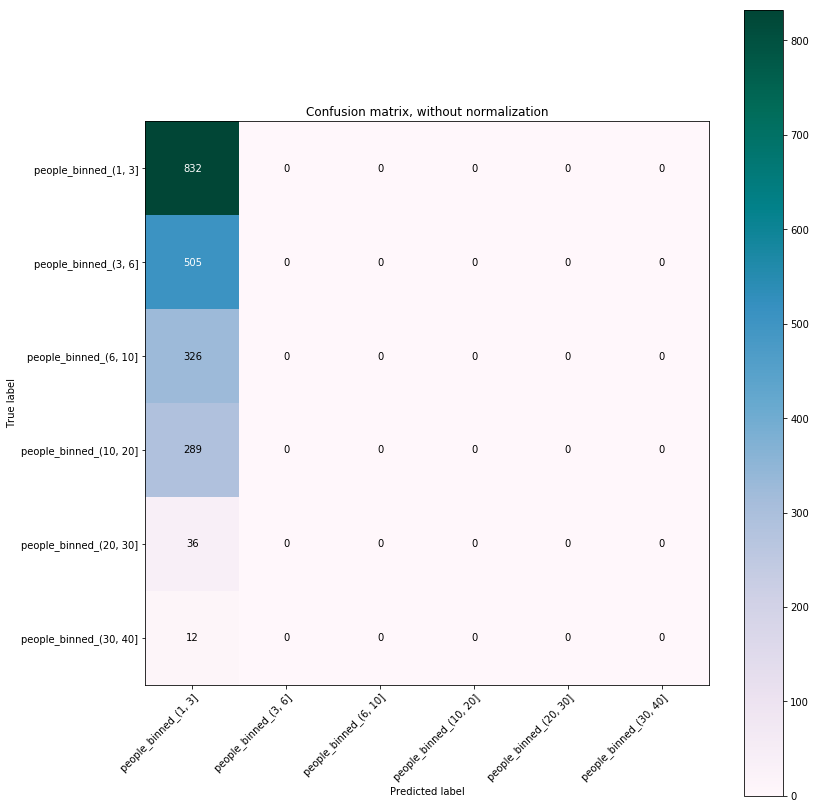

In [31]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.PuBuGn):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

#### Roc Curve 

In [32]:
# binarizar la variable y

from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [33]:
# SVC (Probability = True)

clfc = OneVsRestClassifier(svm.SVC(probability = True))
y_score = clfc.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [34]:
# Roc Curve 
# Auc

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [35]:
# micro-average Roc curve 
# micro-average Auc

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [36]:
# macro-average Roc curve 
# macro-average Auc

from scipy import interp

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

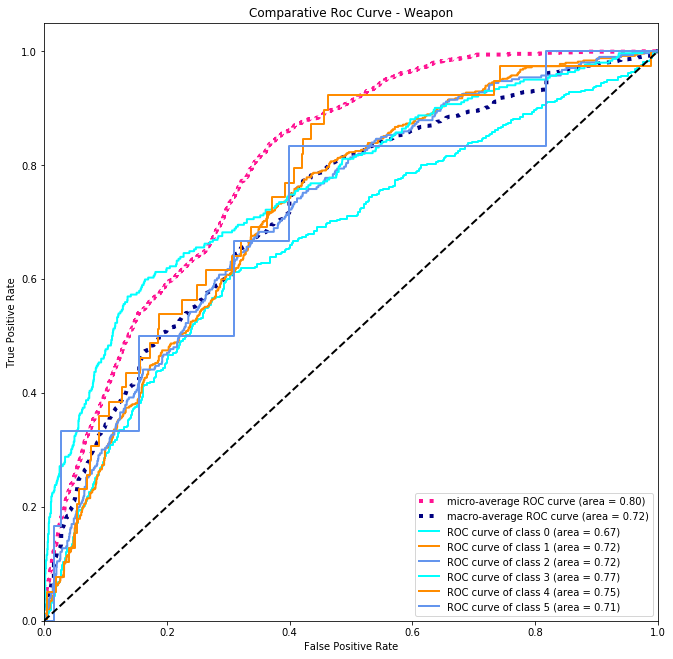

In [37]:
from itertools import cycle

plt.figure(figsize = (11, 11))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative Roc Curve - Weapon')
plt.legend(loc="lower right")
plt.show()

## Model Random Forest

#### y_pred Accuracy

In [38]:
y_pred = clsrf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8565


#### Precision, Recall & F-score

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [51]:
actual_values = y_test.values.argmax(axis=1)
predictions = clsrf.predict(X_test).argmax(axis=1)
predictions

array([0, 1, 1, ..., 3, 0, 0])

In [52]:
precision = pd.DataFrame(precision_score(actual_values, predictions, average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions, average=None))
f_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

In [53]:
precision_recall = pd.concat([precision, recall, f_score], axis=1)
precision_recall.columns = ['Precision', 'Recall', 'F score']
precision_recall.index = ['people_binned_(1, 3]', 'people_binned_(3, 6]', 'people_binned_(6, 10]', 'people_binned_(10, 20]', 'people_binned_(20, 30]', 'people_binned_(30, 40]']
precision_recall.index.name = 'Number of People Attacking'
precision_recall

,Precision,Recall,F score
Number of People Attacking,,,
"people_binned_(1, 3]",0.799601,0.984049,0.882288
"people_binned_(3, 6]",0.953437,0.839844,0.893043
"people_binned_(6, 10]",0.955390,0.771772,0.853821
"people_binned_(10, 20]",0.975309,0.814433,0.887640
"people_binned_(20, 30]",1.000000,0.742857,0.852459
"people_binned_(30, 40]",1.000000,0.571429,0.727273


#### Accuracy Score (Balanced and not Balanced)

In [54]:
from sklearn.metrics import accuracy_score

# NO PONDERADO
# Ratio correct vs incorrect predictions

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.88

In [55]:
from sklearn.metrics import balanced_accuracy_score

# PONDERADO ---> Más real
# Ratio correct vs incorrect predictions

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.7873972175838014

#### Confusion Matrix (Not normalized)

Confusion matrix, without normalization
[[802   6   2   5   0   0]
 [ 74 430   7   1   0   0]
 [ 61  15 257   0   0   0]
 [ 51   0   3 237   0   0]
 [  9   0   0   0  26   0]
 [  6   0   0   0   0   8]]


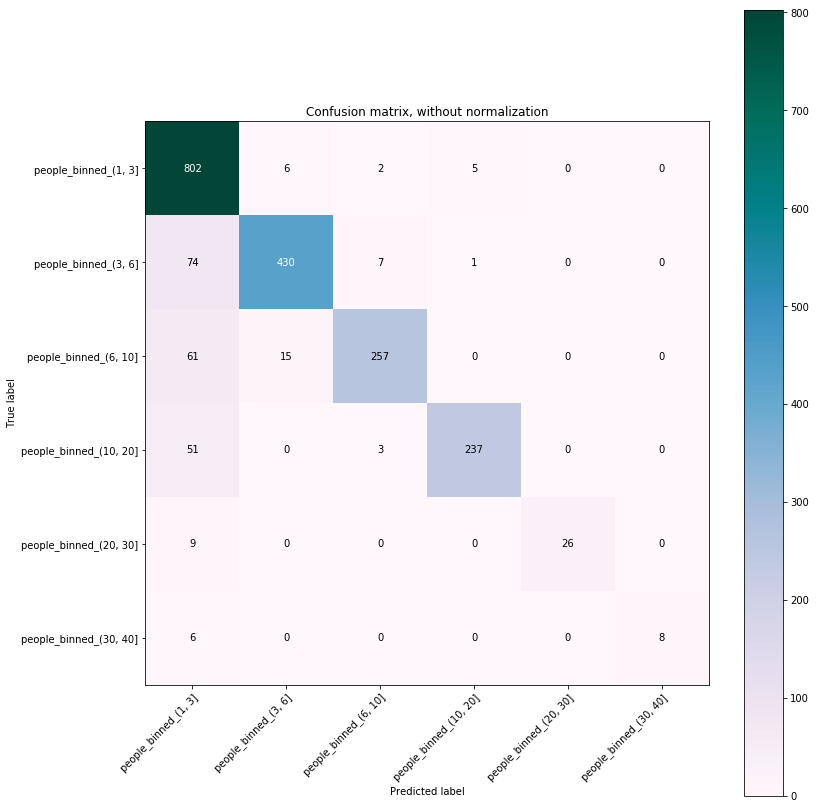

In [56]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.PuBuGn):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

#### Confusion Matrix (Normalized)

Normalized confusion matrix
[[0.98404908 0.00736196 0.00245399 0.00613497 0.         0.        ]
 [0.14453125 0.83984375 0.01367188 0.00195312 0.         0.        ]
 [0.18318318 0.04504505 0.77177177 0.         0.         0.        ]
 [0.17525773 0.         0.01030928 0.81443299 0.         0.        ]
 [0.25714286 0.         0.         0.         0.74285714 0.        ]
 [0.42857143 0.         0.         0.         0.         0.57142857]]


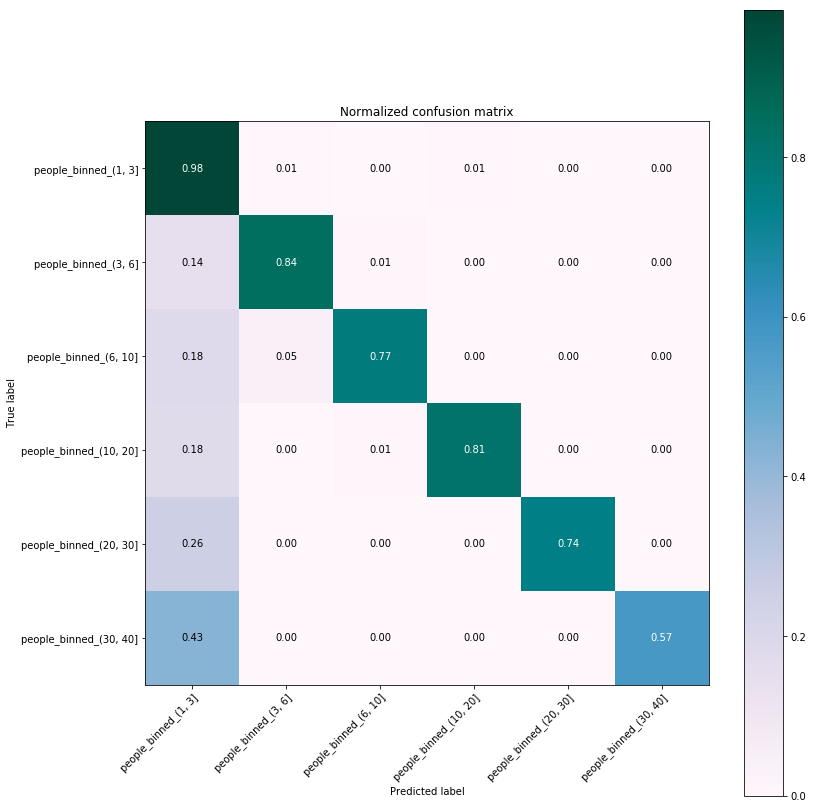

In [57]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=True, title=None, cmap=plt.cm.PuBuGn):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

### 2-. Predict Weapon

In [162]:
y = gts[['weapon_txt_Explosives', 'weapon_txt_Fake Weapons', 'weapon_txt_Firearms', 'weapon_txt_Incendiary', 'weapon_txt_Melee', 'weapon_txt_Other', 'weapon_txt_Radiological', 'weapon_txt_Sabotage Equipment', 'weapon_txt_Unknown', 'weapon_txt_Vehicle (not explosive)']].copy()
X = gts.drop(['weapon_txt_Explosives', 'weapon_txt_Fake Weapons', 'weapon_txt_Firearms', 'weapon_txt_Incendiary', 'weapon_txt_Melee', 'weapon_txt_Other', 'weapon_txt_Radiological', 'weapon_txt_Sabotage Equipment', 'weapon_txt_Unknown', 'weapon_txt_Vehicle (not explosive)'], axis = 1)

display(X.head(), X.shape, y.head(), y.shape, X.dtypes, y.dtypes)

,iyear,more_than_24h,npeople_attacking,suicide,nkill,negative_sentiment,kill,attack,damag,wound,...,band_name_Muslim extremists,band_name_New People's Army (NPA),band_name_Other,band_name_Palestinian Extremists,band_name_Revolutionary Armed Forces of Colombia (FARC),band_name_Salafist Group for Preaching and Fighting (GSPC),band_name_Separatists,band_name_Taliban,band_name_Tehrik-i-Taliban Pakistan (TTP),band_name_Unknown
0,1970,0,1,0,2,0.227,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1970,0,2,0,2,0.306,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1970,0,7,0,1,0.288,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1970,0,3,0,1,0.324,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1970,0,40,0,1,0.316,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


(10000, 108)

,weapon_txt_Explosives,weapon_txt_Fake Weapons,weapon_txt_Firearms,weapon_txt_Incendiary,weapon_txt_Melee,weapon_txt_Other,weapon_txt_Radiological,weapon_txt_Sabotage Equipment,weapon_txt_Unknown,weapon_txt_Vehicle (not explosive)
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


(10000, 10)

iyear                                                           int64
more_than_24h                                                   int64
npeople_attacking                                               int64
suicide                                                         int64
nkill                                                           int64
negative_sentiment                                            float64
kill                                                            int64
attack                                                          int64
damag                                                           int64
wound                                                           int64
polic                                                           int64
explos                                                          int64
fire                                                            int64
injur                                                           int64
shot                

weapon_txt_Explosives                 uint8
weapon_txt_Fake Weapons               uint8
weapon_txt_Firearms                   uint8
weapon_txt_Incendiary                 uint8
weapon_txt_Melee                      uint8
weapon_txt_Other                      uint8
weapon_txt_Radiological               uint8
weapon_txt_Sabotage Equipment         uint8
weapon_txt_Unknown                    uint8
weapon_txt_Vehicle (not explosive)    uint8
dtype: object

In [163]:
X.drop(['negative_sentiment'], axis=1, inplace=True)

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # no se pone random_state para que sea randomly generated sin saltos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 107) (2000, 107) (8000, 10) (2000, 10)


#### SVC

##### with OnevsRestClassifier because it's multiclass

In [74]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.svm import SVC

In [75]:
clfc = OneVsRestClassifier(svm.SVC())
scores4 = cross_val_score(clfc, X, y, cv=5)
print(scores4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.758  0.921  0.878  0.911  0.8805]
Accuracy: 0.87 (+/- 0.12)


#### RandomForestClassifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

clsr = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
scores5 = cross_val_score(clsr, X, y, cv=5)
print(scores5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores5.mean(), scores5.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))


[0.8685 0.9355 0.903  0.9205 0.9125]
Accuracy: 0.91 (+/- 0.04)


#### KNeighborsClassifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

clsk = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
scores6 = cross_val_score(clsk, X, y, cv=5)
print(scores6)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores6.mean(), scores6.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))


[0.6685 0.847  0.7265 0.8205 0.7845]
Accuracy: 0.77 (+/- 0.13)


#### LinearRegression 

In [78]:
from sklearn import linear_model

clsl = OneVsRestClassifier(linear_model.LinearRegression())
scores7 = cross_val_score(clsl, X, y, cv=5)
print(scores7)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores7.mean(), scores7.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))


[0.873 0.927 0.912 0.904 0.867]
Accuracy: 0.90 (+/- 0.05)


#### Logistic Regression (solver="lbfgs")

In [79]:
from sklearn.linear_model import LogisticRegression

clslr = OneVsRestClassifier(LogisticRegression(solver="lbfgs"))
scores8 = cross_val_score(clslr, X, y, cv=5)
print(scores8)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores8.mean(), scores8.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

[0.8365 0.9245 0.9015 0.9125 0.9015]
Accuracy: 0.90 (+/- 0.06)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Fit Train & Test with SVC, Random Forest Classifier, KNN, Linear Regression & Logistic Regression

In [80]:
# SVC

clfc.fit(X_train, y_train)
clfc.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

0.885

In [81]:
# Random Forest Classifier

clsr.fit(X_train, y_train)
clsr.score(X_test, y_test)

0.915

In [82]:
# K-Near Neighbors

clsk.fit(X_train, y_train)
clsk.score(X_test, y_test)

0.8105

In [83]:
# Linear Regression

clsl.fit(X_train, y_train)
clsl.score(X_test, y_test)

0.8995

In [84]:
# Logistic Regression (solver="lbfgs")

clslr.fit(X_train, y_train)
clslr.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

0.9035

### Model Random Forest

#### y_pred Accuracy

In [146]:
# Prediction accuracy Linear Regression

from sklearn import metrics

y_pred1 = clsr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.983


### Precision vs Recall & F-score

In [147]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [148]:
actual_values = y_test.values.argmax(axis=1)
predictions = clsr.predict(X_test).argmax(axis=1)

In [149]:
precision = pd.DataFrame(precision_score(actual_values, predictions, average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions, average=None))
f_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

In [151]:
precision_recall = pd.concat([precision, recall, f_score], axis=1)
precision_recall.columns = ['Precision', 'Recall', 'F score']
precision_recall.index = ['weapon_txt_Explosives', 'weapon_txt_Fake Weapons', 'weapon_txt_Firearms', 'weapon_txt_Incendiary', 'weapon_txt_Radiological', 'weapon_txt_Sabotage Equipment']
precision_recall.index.name = 'Weapon'
precision_recall

,Precision,Recall,F score
Weapon,,,
weapon_txt_Explosives,0.982103,0.997727,0.989853
weapon_txt_Fake Weapons,0.986200,0.992521,0.989350
weapon_txt_Firearms,1.000000,0.687500,0.814815
weapon_txt_Incendiary,0.950820,0.794521,0.865672
weapon_txt_Radiological,0.988636,0.956044,0.972067
weapon_txt_Sabotage Equipment,1.000000,1.000000,1.000000


#### Accuracy Score (Balanced and not balanced)

In [152]:
from sklearn.metrics import accuracy_score

# NO PONDERADO
# Ratio correct vs incorrect predictions

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9835

In [153]:
from sklearn.metrics import balanced_accuracy_score

# PONDERADO ---> Más real
# Ratio correct vs incorrect predictions

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9047188573729669

#### Confusion Matrix

Confusion matrix, without normalization
[[878   2   0   0   0   0]
 [  5 929   0   2   0   0]
 [  2   3  11   0   0   0]
 [  6   8   0  58   1   0]
 [  3   0   0   1  87   0]
 [  0   0   0   0   0   4]]


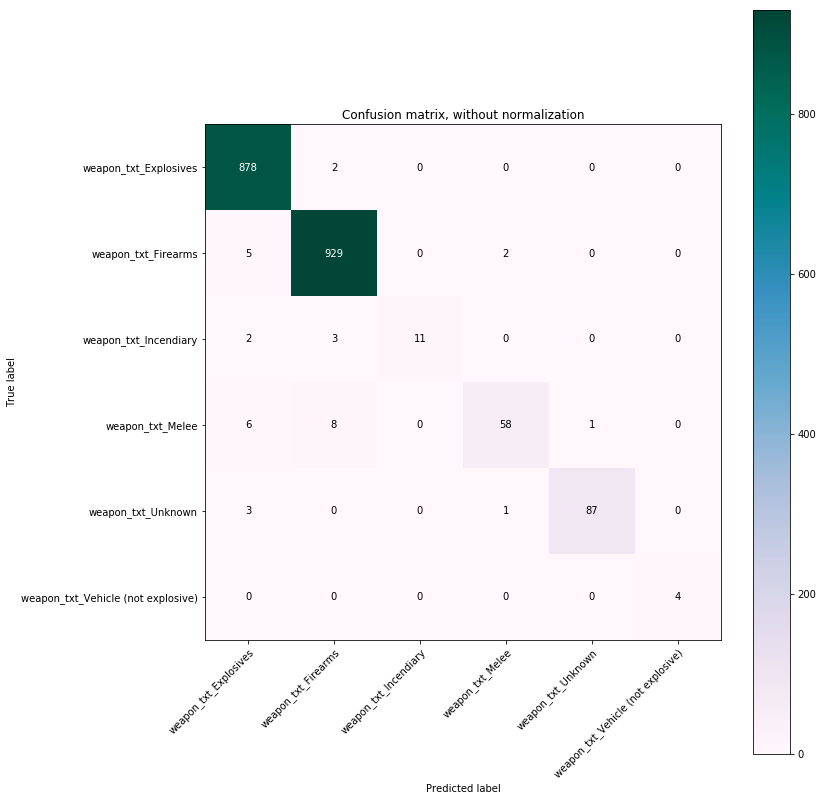

In [154]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.PuBuGn):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

#### Roc Curve

In [165]:
# binarizar la variable y

from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [166]:
# Random Forest

clsr = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
y_score = clsr.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))


In [167]:
# Roc Curve 
# Auc

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [168]:
# micro-average Roc curve 
# micro-average Auc

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [169]:
# macro-average Roc curve 
# macro-average Auc

from scipy import interp

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

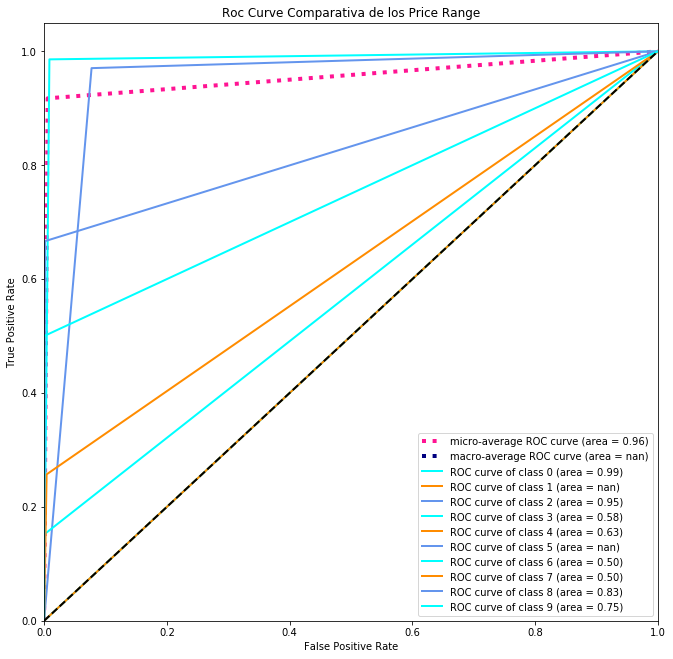

In [170]:
from itertools import cycle

plt.figure(figsize = (11, 11))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve Comparativa de los Price Range')
plt.legend(loc="lower right")
plt.show()

### Model SVC (probability = True)

#### y_pred Accuracy

In [107]:
# Prediction accuracy SVC

from sklearn import metrics
'''
clfc = OneVsRestClassifier(svm.SVC(probability = True))
clfc.fit(X_train, y_train)
y_pred2 = clfc.predict_proba(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
'''

clfc = OneVsRestClassifier(svm.SVC(probability = True))
y_score = clfc.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

#### Precision vs Recall & F-score

In [108]:
actual_values = y_test.values.argmax(axis=1)
predictions = clfc.predict(X_test).argmax(axis=1)
predictions

array([0, 2, 0, ..., 2, 0, 0])

In [109]:
precision = pd.DataFrame(precision_score(actual_values, predictions, average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions, average=None))
f_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
precision_recall = pd.concat([precision, recall, f_score], axis=1)
precision_recall.columns = ['Precision', 'Recall', 'F score']
precision_recall.index = ['weapon_txt_Explosives', 'weapon_txt_Fake Weapons', 'weapon_txt_Firearms', 'weapon_txt_Incendiary', 'weapon_txt_Melee', 'weapon_txt_Radiological', 'weapon_txt_Vehicle (not explosive)', 'weapon_txt_Sabotage Equipment']
precision_recall.index.name = 'Weapon'
precision_recall

,Precision,Recall,F score
Weapon,,,
weapon_txt_Explosives,0.956757,0.968271,0.962480
weapon_txt_Fake Weapons,0.865554,0.978912,0.918750
weapon_txt_Firearms,1.000000,0.142857,0.250000
weapon_txt_Incendiary,0.000000,0.000000,0.000000
weapon_txt_Melee,0.000000,0.000000,0.000000
weapon_txt_Radiological,0.000000,0.000000,0.000000
weapon_txt_Vehicle (not explosive),1.000000,0.514286,0.679245
weapon_txt_Sabotage Equipment,0.000000,0.000000,0.000000


#### Accuracy Score (Balanced and not balanced)

In [111]:
# NO PONDERADO
# Ratio correct vs incorrect predictions

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9115

In [112]:
# PONDERADO ---> Más real
# Ratio correct vs incorrect predictions

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.32554081394747736

#### Confusion Matrix

Confusion matrix, without normalization
[[885  29   0   0   0   0   0   0]
 [ 19 882   0   0   0   0   0   0]
 [  0  12   2   0   0   0   0   0]
 [  9  54   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [ 11  40   0   0   0   0  54   0]
 [  0   1   0   0   0   0   0   0]]


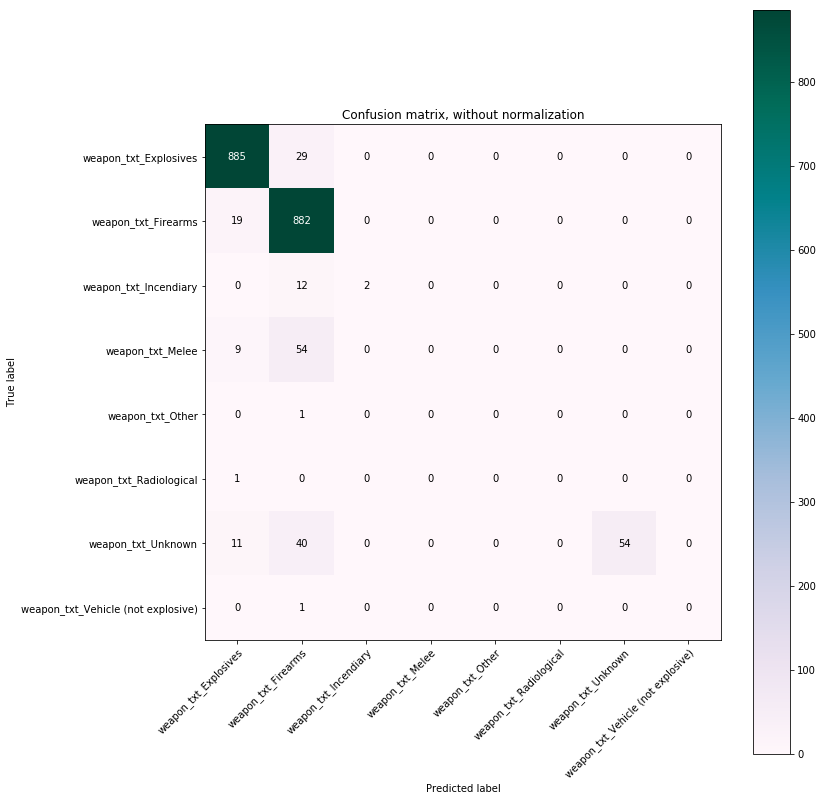

In [113]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.PuBuGn):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

#### Roc Curve

In [130]:
# binarizar la variable y

from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [131]:
# SVC (Probability = True)

clfc = OneVsRestClassifier(svm.SVC(probability = True))
y_score = clfc.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [132]:
# Roc Curve 
# Auc

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

/usr/local/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [133]:
# micro-average Roc curve 
# micro-average Auc

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [134]:
# macro-average Roc curve 
# macro-average Auc

from scipy import interp

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

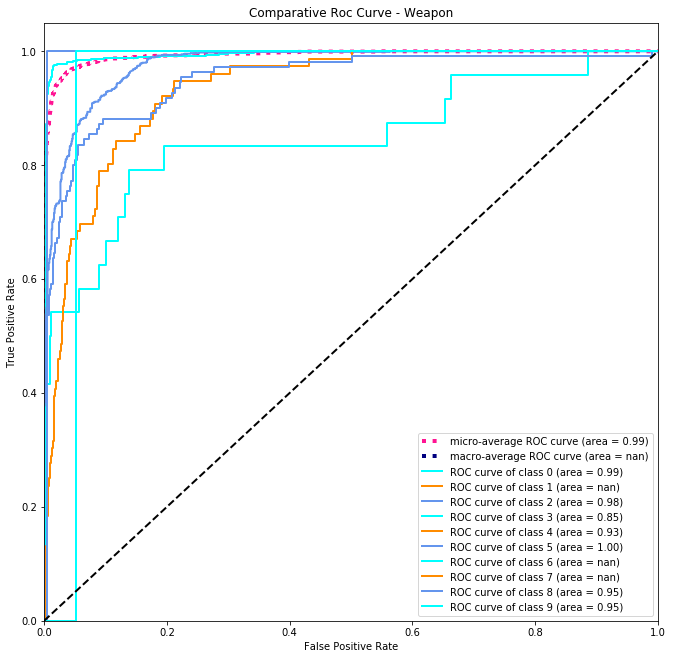

In [135]:
from itertools import cycle

plt.figure(figsize = (11, 11))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative Roc Curve - Weapon')
plt.legend(loc="lower right")
plt.show()

### 3-. Predict if the attack is going to be extended more than 24h

In [175]:
y = gts[['more_than_24h']].copy()
X = gts.drop(['more_than_24h'], axis = 1)

display(X.head(), X.shape, y.head(), y.shape)

,iyear,npeople_attacking,suicide,nkill,negative_sentiment,kill,attack,damag,wound,polic,...,weapon_txt_Explosives,weapon_txt_Fake Weapons,weapon_txt_Firearms,weapon_txt_Incendiary,weapon_txt_Melee,weapon_txt_Other,weapon_txt_Radiological,weapon_txt_Sabotage Equipment,weapon_txt_Unknown,weapon_txt_Vehicle (not explosive)
0,1970,1,0,2,0.227,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1970,2,0,2,0.306,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1970,7,0,1,0.288,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1970,3,0,1,0.324,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,1970,40,0,1,0.316,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


(10000, 117)

,more_than_24h
0,0
1,0
2,0
3,0
4,0


(10000, 1)

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # no se pone random_state para que sea randomly generated sin saltos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 117) (2000, 117) (8000, 1) (2000, 1)


#### SVC

In [177]:
clfsvc = svm.SVC()
scores1 = cross_val_score(clfsvc, X, y, cv=5)
print(scores1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

[0.9465 0.956  0.956  0.956  0.956 ]
Accuracy: 0.95 (+/- 0.01)


#### Random Forest Classifier

In [178]:
clsrf = RandomForestClassifier(n_estimators=20)
scores2 = cross_val_score(clsrf, X, y, cv=5)
print(scores2)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

[0.6785 0.963  0.957  0.9605 0.956 ]
Accuracy: 0.90 (+/- 0.22)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


#### KNeighborsClassifier

In [179]:
from sklearn.neighbors import KNeighborsClassifier

clskn = KNeighborsClassifier(n_neighbors=3)
scores3 = cross_val_score(clskn, X, y, cv=5)
print(scores3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

[0.6805 0.953  0.9345 0.949  0.9475]
Accuracy: 0.89 (+/- 0.21)


#### LinearRegression

In [180]:
clslr = linear_model.LinearRegression()
scores4 = cross_val_score(clslr, X, y, cv=5)
print(scores4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std() * 2))

[0.25794883 0.2409915  0.19922991 0.37272631 0.38995149]
Accuracy: 0.29 (+/- 0.15)


#### Logistic Regression (solver="lbfgs")

In [181]:
clslrg = LogisticRegression(solver="lbfgs")
scores5 = cross_val_score(clslrg, X, y, cv=5)
print(scores5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores5.mean(), scores5.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConver

[0.96   0.9625 0.9605 0.962  0.9575]
Accuracy: 0.96 (+/- 0.00)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Fit Train & Test with SVC, Random Forest Classifier, KNN, Linear Regression & Logistic Regression

In [182]:
# SVC

clfsvc.fit(X_train, y_train)
clfsvc.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9495

In [183]:
# Random Forest Classifier

clsrf.fit(X_train, y_train)
clsrf.score(X_test, y_test)

/Users/Livia/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.957

In [184]:
# KNeighborsClassifier

clskn.fit(X_train, y_train)
clskn.score(X_test, y_test)

/Users/Livia/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9505

In [185]:
# Linear Regression

clslr.fit(X_train, y_train)
clslr.score(X_test, y_test)

0.367982967027216

In [186]:
# Logistic Regression (solver="lbfgs")

clslrg.fit(X_train, y_train)
clslrg.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.954

### Model Random Forest Classifier

#### y_pred Accuracy

In [187]:
y_pred = clsrf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.957


#### Confusion Matrix

Confusion matrix, without normalization
[[1887   12]
 [  74   27]]
Normalized confusion matrix
[[0.99 0.01]
 [0.73 0.27]]


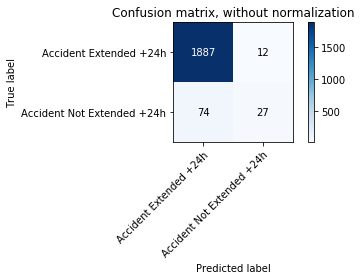

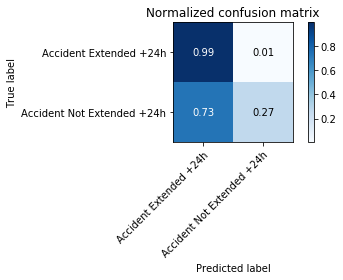

In [188]:

from sklearn.utils.multiclass import unique_labels

#class_names = website_dummy.Type
class_names = ['Accident Extended +24h','Accident Not Extended +24h']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes = class_names
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Roc Curve

/Users/Livia/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/Users/Livia/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


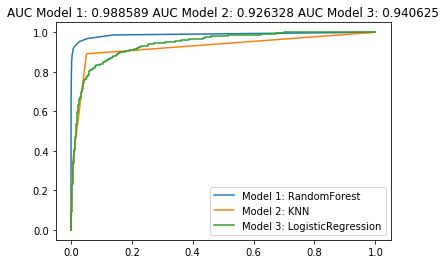

In [189]:
from sklearn import metrics

def plotMetricsCompare(X, y, clsrf, clskn, clslrg):
    clsrf.fit(X_train, y_train)
    clskn.fit(X_train, y_train)
    clslrg.fit(X_train, y_train)
    
    y_pred_proba1 = clsrf.predict_proba(X)[::,1]
    fpr1, tpr1, _ = metrics.roc_curve(y,  y_pred_proba1)
    auc1 = metrics.roc_auc_score(y, y_pred_proba1)
    
    y_pred_proba2 = clskn.predict_proba(X)[::,1]
    fpr2, tpr2, _ = metrics.roc_curve(y,  y_pred_proba2)
    auc2 = metrics.roc_auc_score(y, y_pred_proba2)
    
    y_pred_proba3 = clslrg.predict_proba(X)[::,1]
    fpr3, tpr3, _ = metrics.roc_curve(y,  y_pred_proba3)
    auc3 = metrics.roc_auc_score(y, y_pred_proba3)
    

    plt.title("AUC Model 1: {:2f} AUC Model 2: {:2f} AUC Model 3: {:2f}".format(auc1, auc2, auc3))
    plt.plot(fpr1,tpr1)
    plt.plot(fpr2,tpr2)
    plt.plot(fpr3,tpr3)

    plt.legend(["Model 1: RandomForest", "Model 2: KNN", "Model 3: LogisticRegression"])

plotMetricsCompare(X, y, clsrf, clskn, clslrg)